In [246]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

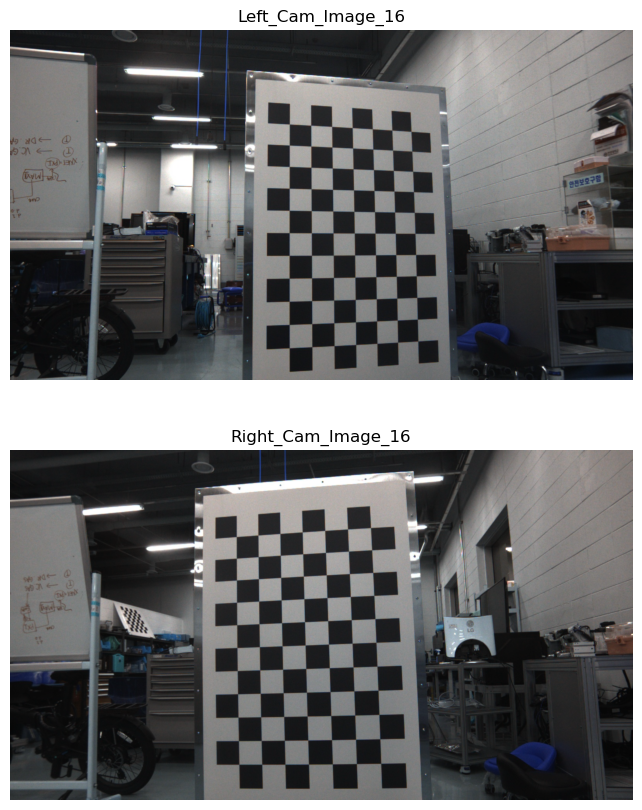

In [304]:
img_index = 15

img_right_color = cv2.imread('data/images/cam1/cam1_{0:04d}.jpg'.format(img_index))
img_left_color = cv2.imread('data/images/cam2/cam2_{0:04d}.jpg'.format(img_index))

img_right = cv2.cvtColor(img_right_color, cv2.COLOR_BGR2GRAY)
img_left = cv2.cvtColor(img_left_color, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img_left,None)
kp2, des2 = sift.detectAndCompute(img_right,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

fig, axs = plt.subplots(2, figsize=(20, 10))
axs[0].imshow(img_left_color)
axs[0].set_axis_off()
axs[0].set_title('Left_Cam_Image_15')

axs[1].imshow(img_right_color)
axs[1].set_axis_off()
axs[1].set_title('Right_Cam_Image_15')
plt.show()

In [316]:
for i in range(8):
    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

    # inlier로 선택된 점들만 선택
    pts1 = pts1[mask.ravel()==1]
    pts2 = pts2[mask.ravel()==1]

print('Fundamental Matrix:\n', F)

Fundamental Matrix:
 [[ 1.06004385e-07 -5.98679095e-08 -3.92093942e-04]
 [ 2.73570855e-06 -1.93973479e-07 -1.08393929e-02]
 [-1.48593529e-03  9.27133771e-03  1.00000000e+00]]


In [317]:
def drawlines(img1, img2, lines, pts1, pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c = img1.shape
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    # 미리 지정된 10개의 색상 (BGR 형식)
    # colors = [
    #     (255, 0, 0),    # Blue
    #     (0, 255, 0),    # Green
    #     (0, 0, 255),    # Red
    #     (255, 255, 0),  # Cyan
    #     (255, 0, 255),  # Magenta
    #     (0, 255, 255),  # Yellow
    #     (128, 0, 0),    # Dark Blue
    #     (0, 128, 0),    # Dark Green
    #     (0, 0, 128),    # Dark Red
    #     (128, 128, 0)   # Olive
    # ]

    # 색상 리스트를 순환하며 사용
    for i, (r, pt1, pt2) in enumerate(zip(lines, pts1, pts2)):
        # color = colors[i % len(colors)]  # 지정된 색상에서 순환되어 선택
        color = tuple(np.random.randint(0,255,3).tolist())
        x0, y0 = map(int, [0, -r[2] / r[1]])
        x1, y1 = map(int, [c, -(r[2] + r[0] * c) / r[1]])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, thickness=2)
        img1 = cv2.circle(img1, tuple(pt1), 8, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 8, color, -1)
    return img1, img2

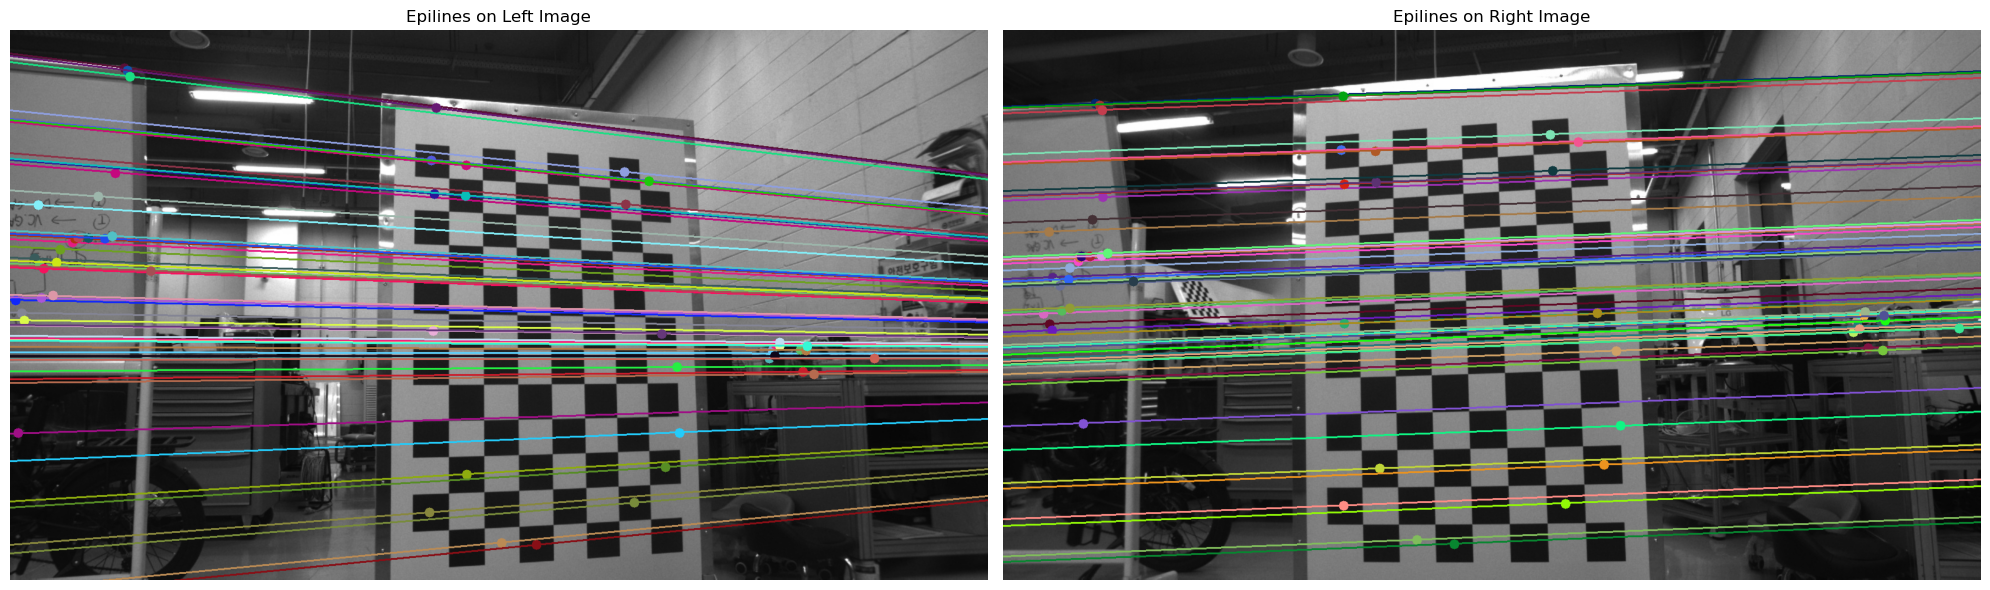

In [318]:
# num_matched_points = 10
# random_indices = np.random.choice(len(pts1), num_matched_points, replace=False)

# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img_left, img_right, lines1, pts1, pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img_right, img_left, lines2, pts2, pts1)

# Create a figure with larger size
plt.figure(figsize=(20, 10))  # Adjust the figsize to make the images larger

# Plot the left image with epilines
plt.subplot(121)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
plt.axis('off')  # Turn off axis
plt.title('Epilines on Left Image')

# Plot the right image with epilines
plt.subplot(122)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
plt.axis('off')  # Turn off axis
plt.title('Epilines on Right Image')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Feature Points

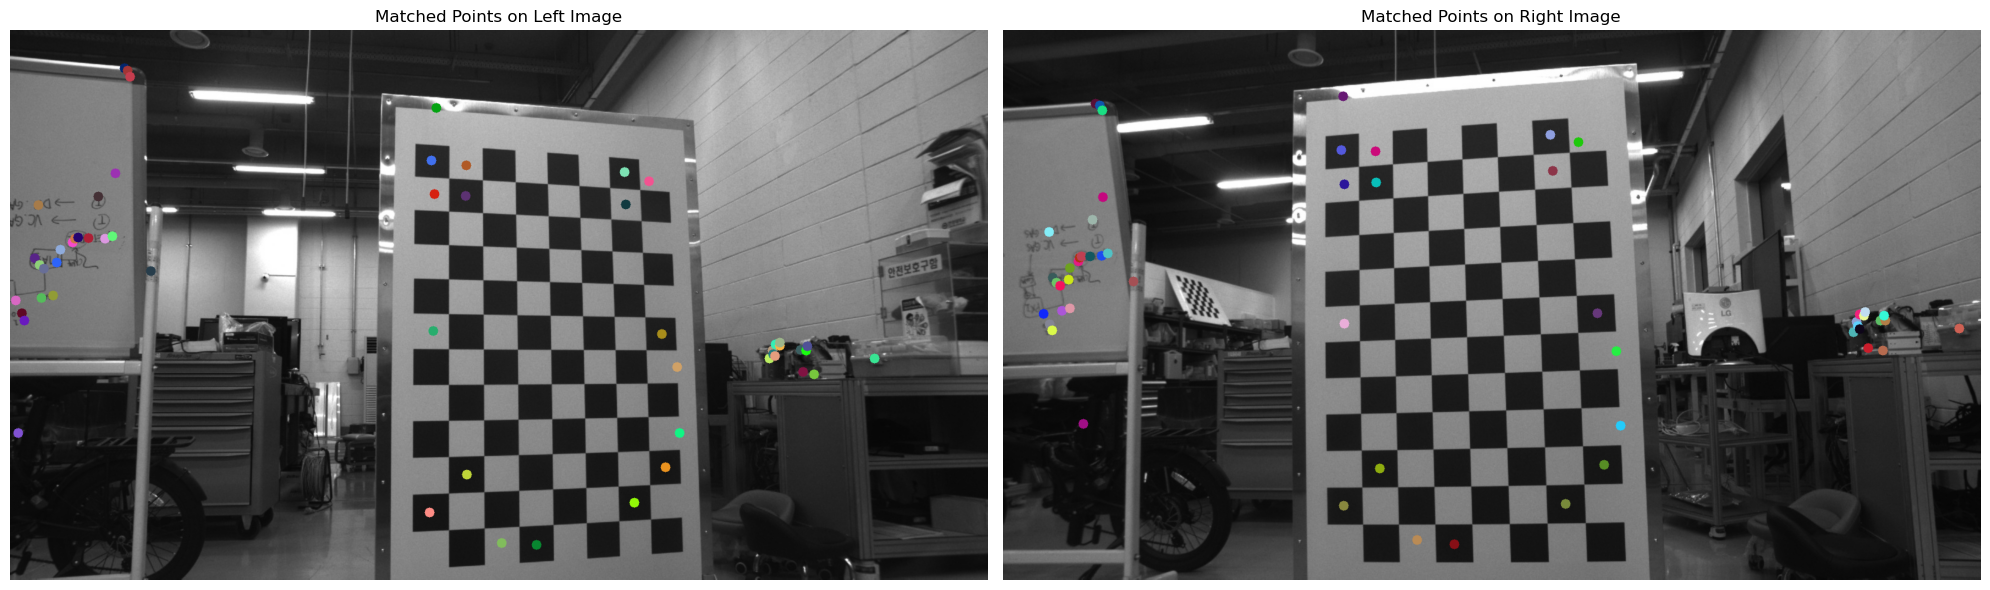

In [320]:
# Create a figure with larger size
plt.figure(figsize=(20, 10))  # Adjust the figsize to make the images larger

# Plot the left image with epilines
plt.subplot(121)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
plt.axis('off')  # Turn off axis
plt.title('Matched Points on Left Image')

# Plot the right image with epilines
plt.subplot(122)
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper display
plt.axis('off')  # Turn off axis
plt.title('Matched Points on Right Image')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()